

Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

Откуда брать данные?

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, kaggle.com). Если идей нет, можете взять один из перечисленных ниже:

    Данные IMDB;
    Данные NYC;
    Данные NBA.



Я взял датасет машин выставленных на продажу в америке: https://www.kaggle.com/doaaalsenani/usa-cers-dataset/data

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 9

import pandas as pd
import matplotlib.pyplot as plt

In [73]:
car=pd.read_csv('usa_cars_datasets.csv', sep=',', encoding='latin-1')
car['price'] = car.price.astype('int64')
car=car.rename(columns={'car':'brand'})
car.head(20)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
Unnamed: 0      2499 non-null int64
price           2499 non-null int64
brand           2499 non-null object
model           2499 non-null object
year            2499 non-null int64
title_status    2499 non-null object
mileage         2499 non-null float64
color           2499 non-null object
vin             2499 non-null object
lot             2499 non-null int64
state           2499 non-null object
country         2499 non-null object
condition       2499 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [6]:
car = car.dropna()
print(car.shape)

(2499, 13)


In [69]:
car_expensive=car.groupby('brand').mean().sort_values('price', ascending=False).head(15)
car_expensive=car_expensive.reset_index(level=0, drop=False)
car_expensive

,brand,Unnamed: 0,price,year,mileage,lot
0,harley-davidson,380.000000,54680.000000,2016.000000,9502.000000,1.677034e+08
1,lexus,464.500000,33220.000000,2018.500000,22391.000000,1.676492e+08
2,maserati,476.000000,30300.000000,2017.000000,37021.000000,1.676078e+08
3,land,460.000000,28900.000000,2018.000000,26613.750000,1.672671e+08
4,mercedes-benz,403.500000,28704.000000,2016.900000,54597.000000,1.675191e+08
5,bmw,336.235294,26397.058824,2014.470588,47846.411765,1.677167e+08
6,cadillac,235.900000,24941.000000,2014.900000,40195.900000,1.677568e+08
7,ford,1443.951417,21666.888259,2016.762753,52084.304453,1.677053e+08
8,buick,313.153846,19715.769231,2016.000000,37926.846154,1.677610e+08
9,chevrolet,552.508418,18669.952862,2015.616162,65124.461279,1.677652e+08


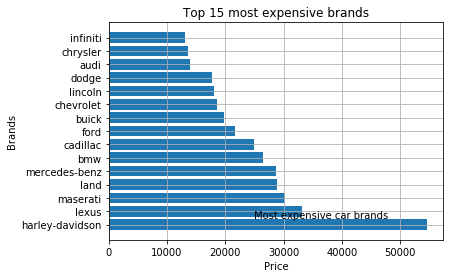

In [70]:
plt.barh(car_expensive['brand'], car_expensive['price'])
plt.xlabel('Price')
plt.ylabel('Brands')
plt.title('Top 15 most expensive brands')
plt.text(25000, 0.5, 'Most expensive car brands')
plt.grid()

Самый дорогой бренд - Harley-Davidson

In [38]:
def age_function(row):
    age_car=2019-row['year']
    return age_car

car['age']=car.apply(age_function, axis=1)

car_mileage=car.groupby(['year', 'brand']).agg(['mean'])['mileage']
car_mileage.reset_index(level=1).head()

,brand,mean
year,,
1973,chevrolet,46226.0
1984,ford,41577.0
1993,gmc,0.0
1994,ford,103081.0
1995,chevrolet,274706.0


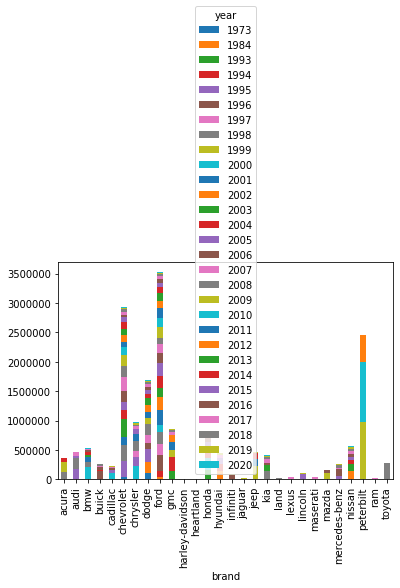

In [39]:
car_mileage=car_mileage.pivot_table(index = 'brand', columns = 'year', values = 'mean', fill_value = 0)


car_mileage[list(filter(lambda x: x != 'Other', car_mileage.columns))]\
    .plot(kind='bar', rot=450, stacked=True)

Получаем вывод, что автомобили с самым большим пробегом - Ford, Chevrolet и Peterbilt. По данной визуализации можно также узнать именно какого года автомобили сколько проехали. Также можно сделать выводы по вилкам пройденного расстояния каждым автомобильным брендом определенного года. 

In [74]:

car['age']=car.apply(age_function, axis=1)

car_price=car.groupby(['brand', 'year']).agg(['mean'])['price']
car_price.reset_index(level=1).head()

,year,mean
brand,,
acura,2008,1000.0
acura,2009,3900.0
acura,2014,16900.0
audi,2005,0.0
audi,2008,25.0


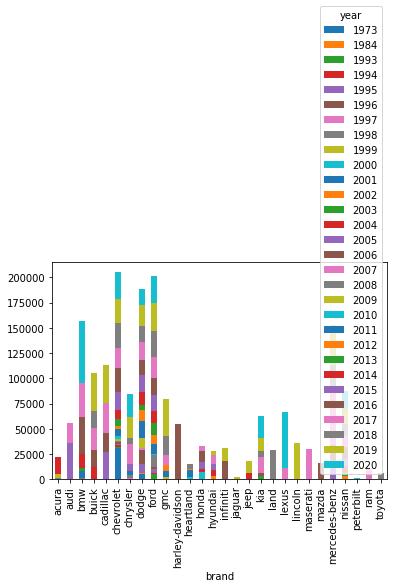

In [75]:
car_price=car_price.pivot_table(index = 'brand', columns = 'year', values = 'mean', fill_value = 0)


car_price[list(filter(lambda x: x != 'Other', car_price.columns))]\
    .plot(kind='bar', rot=450, stacked=True)

Получаем вывод, что автомобили с самыми большими стоимостями лотов - Chevrolet, Ford и Dodge. По данной визуализации можно также узнать именно какого года автомобили стоят дороже всего.

Буду сравнивать три американских извечных бренда-конкурента: Ford, Dodge, Chevrolet по критериям цены, возраста, пробега

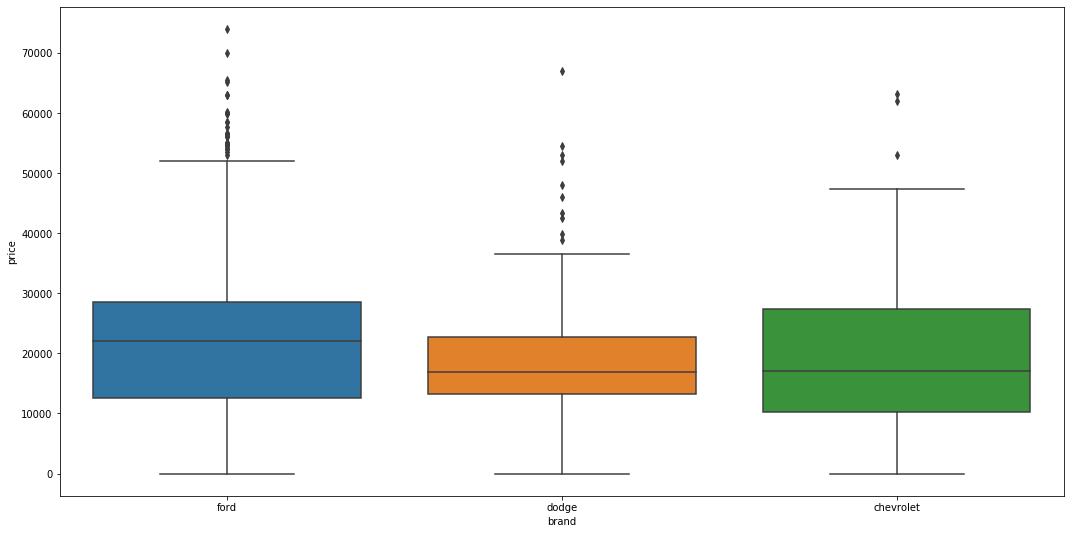

In [59]:
import seaborn as sns

american_cars=['ford', 'dodge', 'chevrolet']
ax = sns.boxplot(x='brand', y='price', 
            data=car[car.brand.isin(american_cars)])

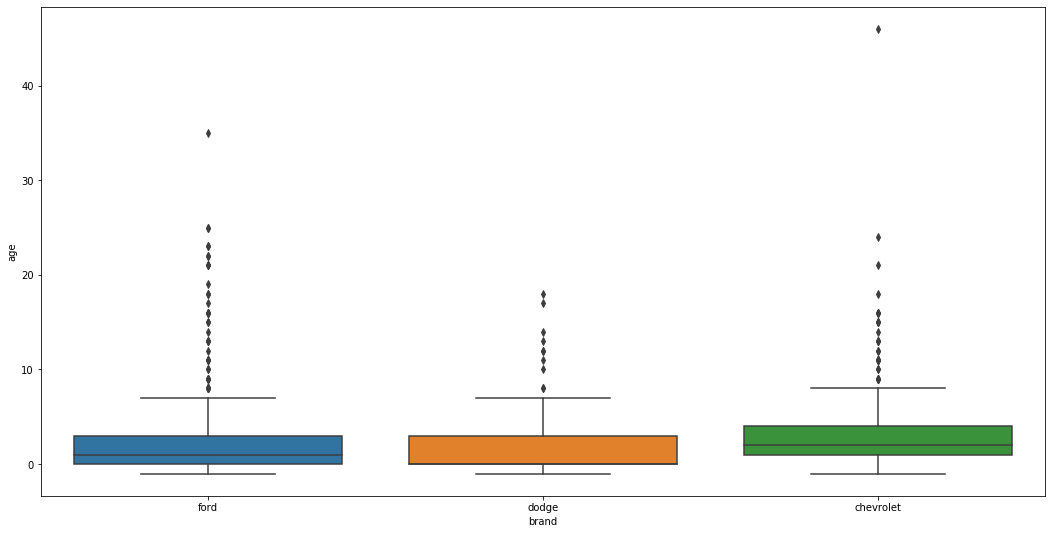

In [60]:
american_cars=['ford', 'dodge', 'chevrolet']
ax = sns.boxplot(x='brand', y='age', 
            data=car[car.brand.isin(american_cars)])

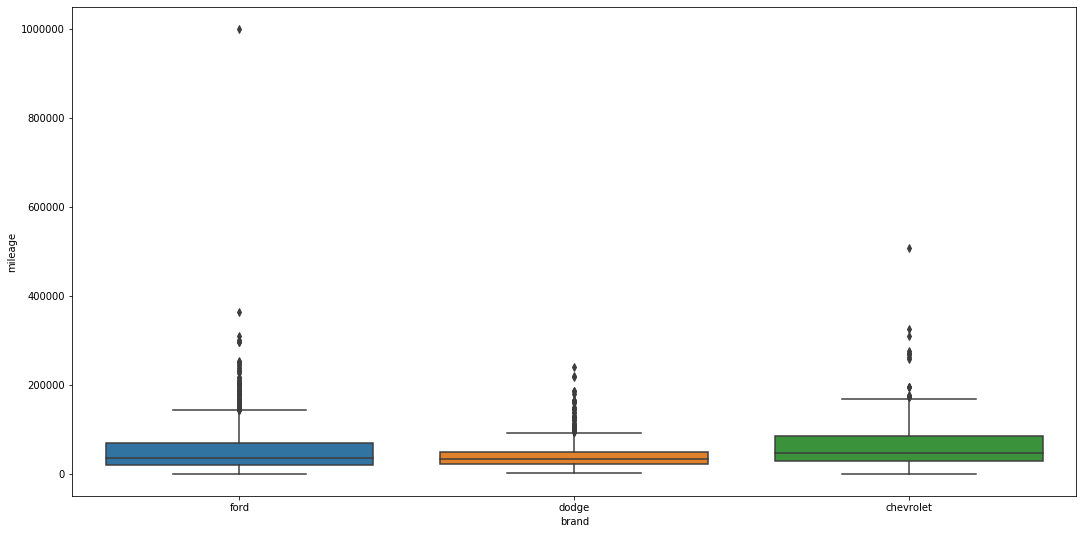

In [61]:
american_cars=['ford', 'dodge', 'chevrolet']
ax = sns.boxplot(x='brand', y='mileage', 
            data=car[car.brand.isin(american_cars)])


Вывод:

Ford стоят значительно дороже и стоимость чаще выходит из интерквартильного размаха, несмотря на то, что возраст не выше конкурентов. По возрасту - все машины примерно одинаковы, но вот на Chevrolet проезжают больше миль, а на Dodge меньше всего.


